In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
data = pd.read_csv('dummy_data.csv',index_col=0)
# Print the average values of the variables in the dataset
print(data.mean())

# Print the standard deviation of the variables in the dataset
print(data.std())

# Get the key statistics of the dataset
(data.describe())

var1    451.88000
var2     13.17410
var3    235.26386
dtype: float64
var1     192.288308
var2      35.099872
var3    1906.427878
dtype: float64


,var1,var2,var3
count,100.000000,100.000000,100.000000
mean,451.880000,13.174100,235.263860
std,192.288308,35.099872,1906.427878
min,107.000000,0.006000,0.001000
25%,305.750000,0.136250,0.068000
50%,442.000000,0.638000,0.431000
75%,609.250000,6.080750,4.039250
max,795.000000,243.805000,19002.040000


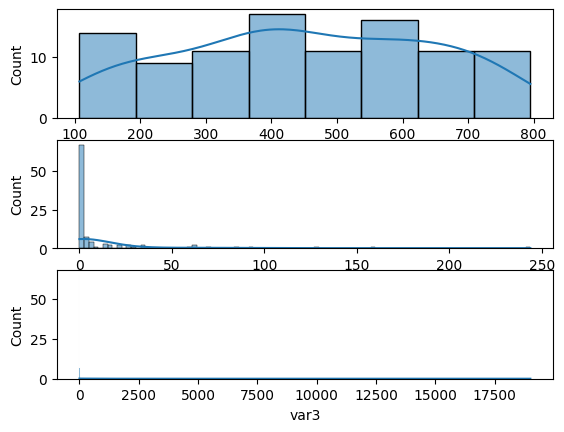

In [6]:
# Plot distribution of var1
plt.subplot(3, 1, 1); sns.histplot(data['var1'], kde = True)

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.histplot(data['var2'], kde = True)

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.histplot(data['var3'], kde = True)

# Show the plot
plt.show()

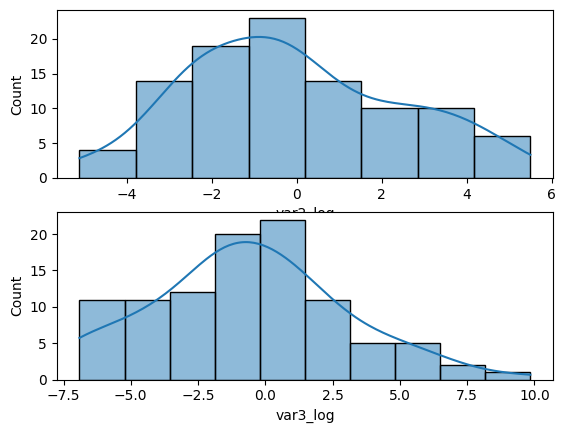

In [7]:
# Apply log transformation to var2
data['var2_log'] = np.log(data['var2'])

# Apply log transformation to var3
data['var3_log'] = np.log(data['var3'])

# Create a subplot of the distribution of var2_log
plt.subplot(2, 1, 1); sns.histplot(data['var2_log'], kde = True)

# Create a subplot of the distribution of var3_log
plt.subplot(2, 1, 2); sns.histplot(data['var3_log'], kde = True)

# Show the plot
plt.show()

In [8]:
# Center the data by subtracting average values from each entry
data_centered = data - data.mean()

# Scale the data by dividing each entry by standard deviation
data_scaled = data / data.std()

# Normalize the data by applying both centering and scaling
data_normalized = (data - data.mean()) / data.std()

# Print summary statistics to make sure average is zero and standard deviation is one
print(data_normalized.describe().round(2))

         var1    var2    var3  var2_log  var3_log
count  100.00  100.00  100.00    100.00    100.00
mean     0.00    0.00   -0.00      0.00      0.00
std      1.00    1.00    1.00      1.00      1.00
min     -1.79   -0.38   -0.12     -2.02     -1.76
25%     -0.76   -0.37   -0.12     -0.77     -0.58
50%     -0.05   -0.36   -0.12     -0.15     -0.06
75%      0.82   -0.20   -0.12      0.75      0.57
max      1.78    6.57    9.84      2.22      2.94


In [9]:
# Initialize a scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler
scaler.fit(data)

# Scale and center the data
data_normalized = scaler.transform(data)

# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index=data.index, columns=data.columns)

# Print summary statistics
print(data_normalized.describe().round(2))

         var1    var2    var3  var2_log  var3_log
count  100.00  100.00  100.00    100.00    100.00
mean     0.00    0.00   -0.00      0.00      0.00
std      1.01    1.01    1.01      1.01      1.01
min     -1.80   -0.38   -0.12     -2.03     -1.77
25%     -0.76   -0.37   -0.12     -0.77     -0.58
50%     -0.05   -0.36   -0.12     -0.15     -0.06
75%      0.82   -0.20   -0.12      0.75      0.57
max      1.79    6.60    9.89      2.23      2.96


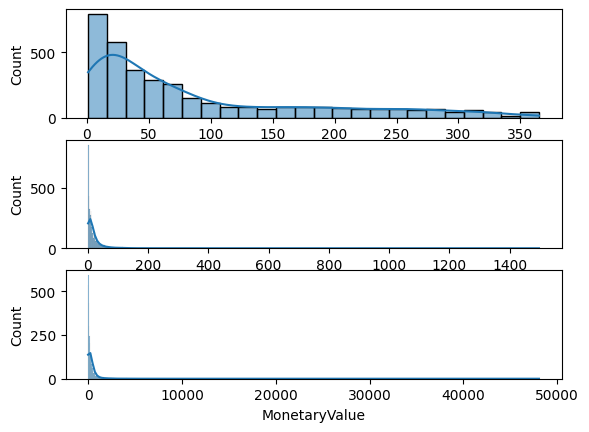

In [12]:
datamart_rfm = pd.read_csv('datamart_rfm.csv',index_col=0)
# Plot recency distribution
plt.subplot(3, 1, 1); sns.histplot(datamart_rfm['Recency'], kde = True)

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.histplot(datamart_rfm['Frequency'], kde = True)

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.histplot(datamart_rfm['MonetaryValue'], kde = True)

# Show the plot
plt.show()

In [14]:
# Unskew the data
datamart_log = np.log(datamart_rfm)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(datamart_log)

# Scale and center the data
datamart_normalized = scaler.transform(datamart_log)

# Create a pandas DataFrame
datamart_normalized = pd.DataFrame(data=datamart_normalized, index=datamart_rfm.index, columns=datamart_rfm.columns)
data_normalized.head()

,var1,var2,var3,var2_log,var3_log
0,-1.645791,-0.362935,0.399001,-0.252167,2.123065
1,-0.610899,-0.111159,-0.123969,0.920969,-0.441008
2,-1.462855,6.603807,-0.123980,2.231671,-0.500113
3,1.532057,-0.262631,0.100239,0.583042,1.884415
4,-1.086531,0.004951,-0.124012,1.066247,-0.819285


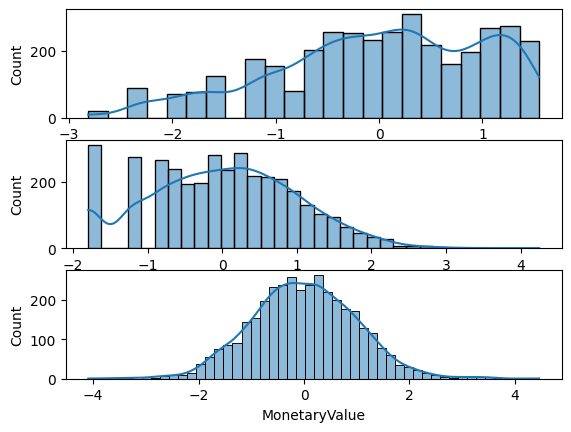

In [16]:
# Plot recency distribution
plt.subplot(3, 1, 1); sns.histplot(datamart_normalized['Recency'], kde = True)

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.histplot(datamart_normalized['Frequency'], kde = True)

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.histplot(datamart_normalized['MonetaryValue'], kde = True)

# Show the plot
plt.show()